In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('churn.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
df.shape

(10000, 14)

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [11]:
df.shape

(10000, 11)

In [12]:
df.isnull().sum() #checks how many null values are in the rows

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
df['Geography'].unique() #returns the unique names in this column

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df.duplicated().sum() #checks to see how many duplicate data points

0

In [16]:
df = df.rename(columns = {'Exited': 'Churn'})

In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#importing data visualization libraries

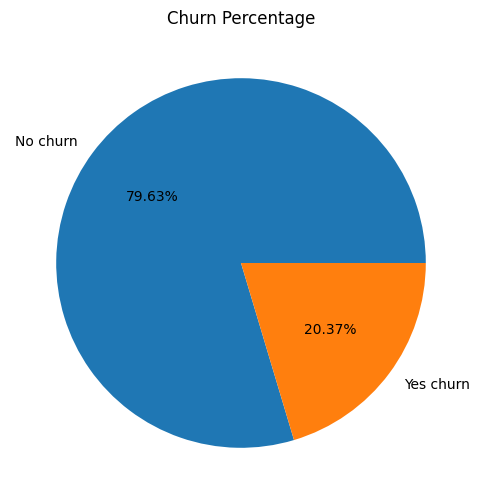

In [19]:
#make a pie chart for churn percentage
plt.figure(figsize = (10,6)) #setup space to make graph
plt.pie(df['Churn'].value_counts(), labels = ['No churn', 'Yes churn'], autopct = '%1.2f%%') #set up pie chart for churn percentage
plt.title('Churn Percentage') #gives graph a title 
plt.show() #display graph

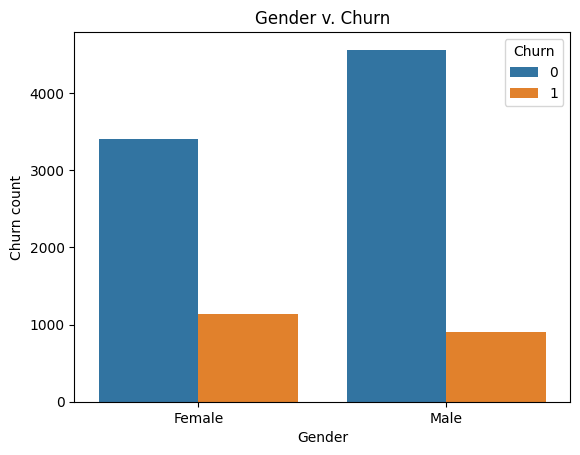

In [20]:
#view relation between gender and customer churn
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender v. Churn')
plt.xlabel('Gender')
plt.ylabel("Churn count")
plt.show()

Text(0.5, 1.0, 'Age v. Churn')

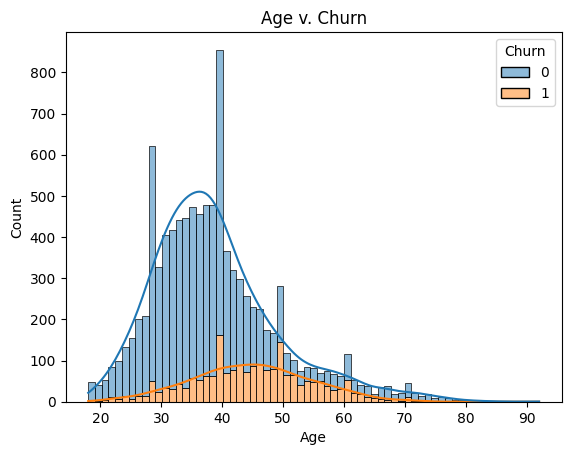

In [21]:
#view age distibutions
sns.histplot(data = df, x = 'Age', hue = 'Churn', multiple = 'stack', kde = True)
plt.title('Age v. Churn')

<Axes: xlabel='Churn', ylabel='CreditScore'>

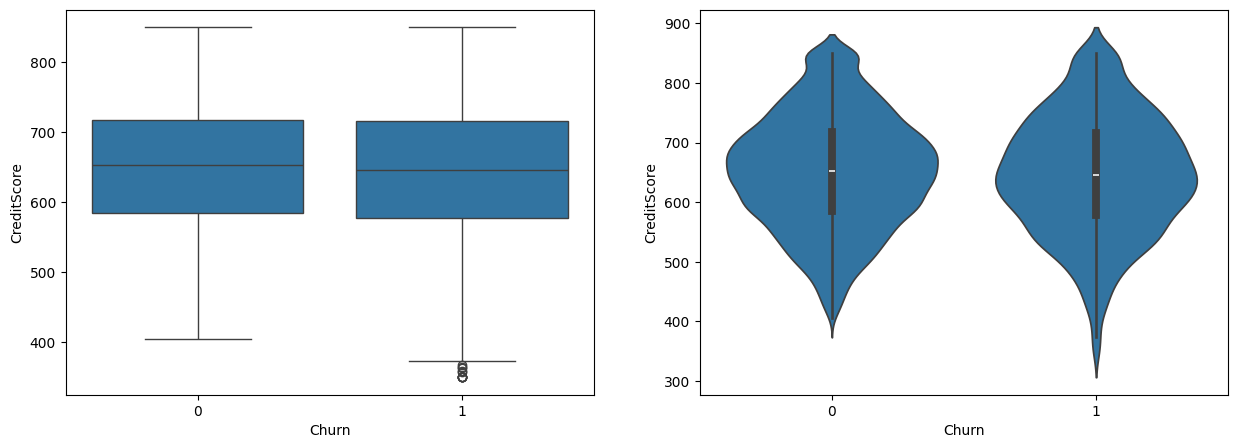

In [22]:
#mkae plots for credit score
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(x = 'Churn', y = 'CreditScore', data = df, ax=ax[0])
sns.violinplot(x = 'Churn', y = 'CreditScore', data = df, ax=ax[1])


Text(0, 0.5, 'Churn count')

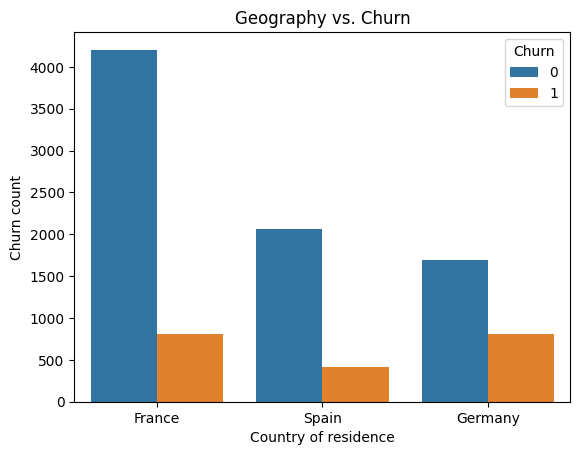

In [23]:
# make a graph for customer location
sns.countplot(x = 'Geography', hue = 'Churn', data = df)
plt.title('Geography vs. Churn')
plt.xlabel('Country of residence')
plt.ylabel('Churn count')

<Axes: xlabel='Tenure', ylabel='count'>

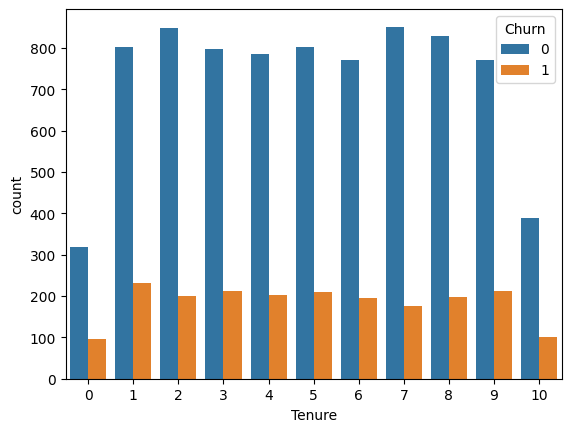

In [24]:
sns.countplot(x='Tenure', hue = 'Churn', data = df)

<Axes: xlabel='Balance', ylabel='Count'>

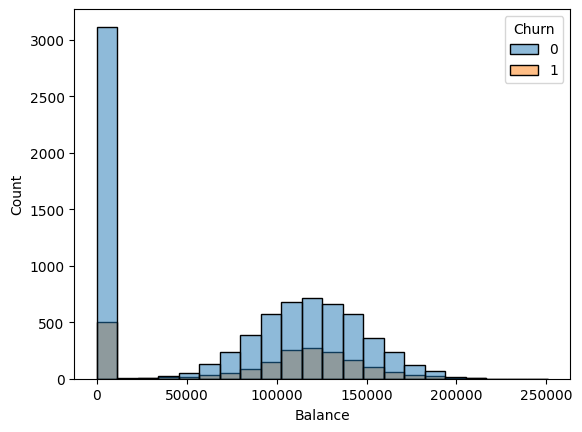

In [25]:
sns.histplot(data = df, x='Balance', hue = 'Churn')

In [26]:
df[df['Balance'] == 0]
#all of these people have salaries but don't have any money in their bank account -- 0s act as null value

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [27]:
df['NumOfProducts'].unique()
#the number of bank accounts

array([1, 3, 2, 4])

<Axes: xlabel='NumOfProducts', ylabel='count'>

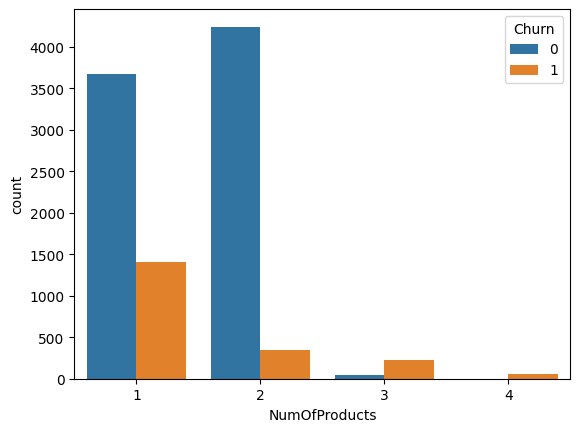

In [28]:
sns.countplot(x = 'NumOfProducts', data = df, hue = 'Churn')


In [30]:
df = df.rename(columns = {'NumOfProducts': 'NumAccounts'})

In [31]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumAccounts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

<Axes: xlabel='HasCrCard', ylabel='count'>

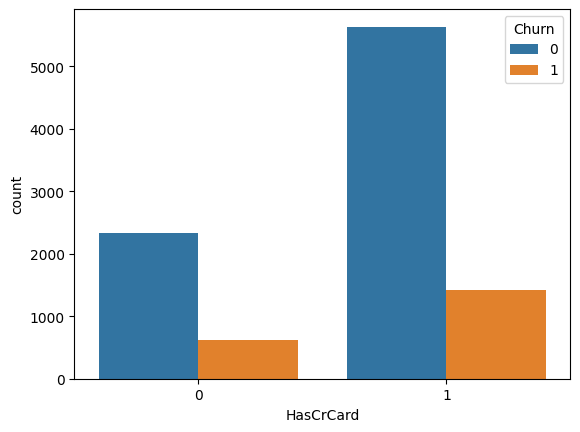

In [32]:
sns.countplot(x = 'HasCrCard', data = df, hue = 'Churn')

<Axes: xlabel='IsActiveMember', ylabel='count'>

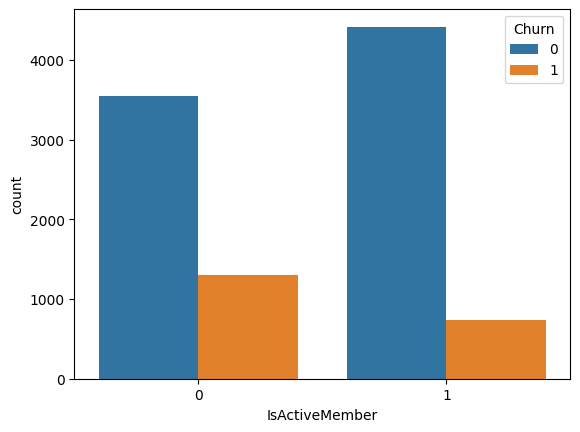

In [33]:
sns.countplot(x = 'IsActiveMember', data = df, hue = 'Churn')

In [35]:
len(df['EstimatedSalary'].unique())

9999

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

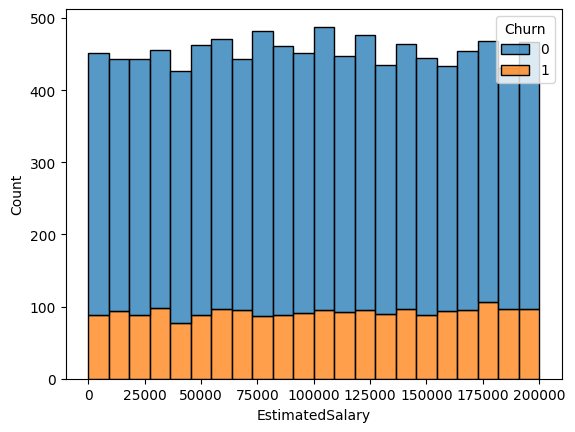

In [37]:
sns.histplot(x='EstimatedSalary', hue = 'Churn', data = df, multiple = 'stack')
#multiple = stack makes the smaller values go in front for visibillity (also brighter)